# XGBClassifier

In [1]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,classification_report
import pandas as pd
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
df = pd.read_csv(r"C:\Users\sahil\Downloads\Steel_industry_data.csv")
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [3]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df.iloc[:,8] = label_encoder.fit_transform(df.iloc[:,8])
df.iloc[:,9] = label_encoder.fit_transform(df.iloc[:,9])
df.iloc[:,10] = label_encoder.fit_transform(df.iloc[:,10])


In [4]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0


<AxesSubplot:>

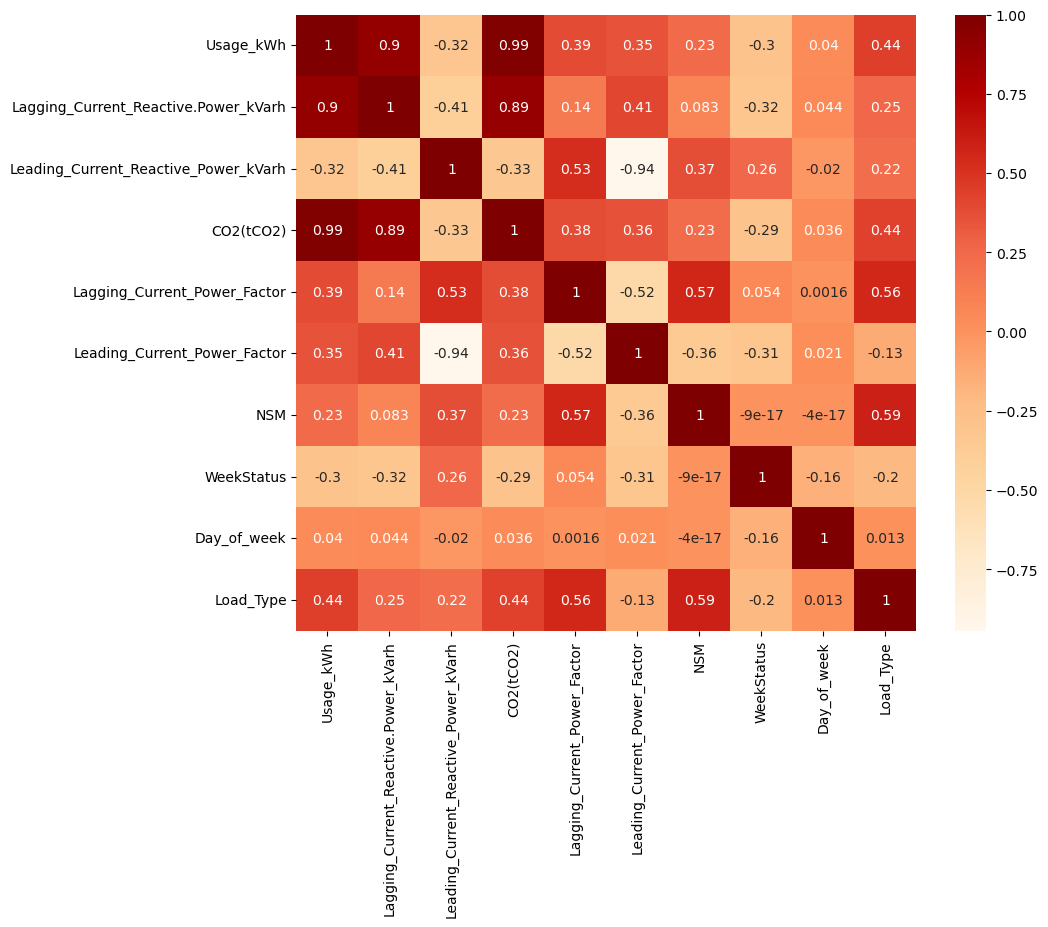

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation =df.corr()
plt.figure(figsize=(10,8))

sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels=correlation.columns,cmap = 'OrRd', annot = True)

In [6]:
X = df.iloc[:,[1,3,5,7,8,9]]
Y = df.iloc[:,10]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  int32  
 9   Day_of_week                           35040 non-null  int32  
 10  Load_Type                             35040 non-null  int32  
dtypes: float64(6), 

In [8]:
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = test_size, 
                                                    random_state = 423)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state = 423)

In [9]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [10]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [11]:
accuracy = accuracy_score(y_test, predictions)
print('Testing accuracy: ',accuracy*100)

y_pred_val = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred_val)
print('Validation accuracy: ',accuracy*100)


Testing accuracy:  91.39269406392694
Validation accuracy:  90.98173515981736


In [12]:
print('Test Classification_Report: ')
print(classification_report(y_pred,y_test))
print('\n\nTest Validation Classification_Report: ')
print(classification_report(y_val,y_pred_val))


Test Classification_Report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2272
           1       0.86      0.83      0.85       941
           2       0.84      0.86      0.85      1167

    accuracy                           0.91      4380
   macro avg       0.89      0.89      0.89      4380
weighted avg       0.91      0.91      0.91      4380



Test Validation Classification_Report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2268
           1       0.82      0.84      0.83       903
           2       0.85      0.84      0.84      1209

    accuracy                           0.91      4380
   macro avg       0.88      0.88      0.88      4380
weighted avg       0.91      0.91      0.91      4380



In [13]:
# %%time

## Finding the best random_state

# RS = []
# Acc = []
# for i in range(500,1500):
#     rs = i
#     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state = rs)
#     model = XGBClassifier()
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     predictions = [round(value) for value in y_pred]
#     accuracy = accuracy_score(y_test, predictions)
#     accuracy *= 100
#     Acc.append(accuracy)
#     RS.append(rs)
    
# best_accuracy_1 = pd.DataFrame(list(zip(RS,Acc)), columns = ['Random_State', 'Accuracy'])



In [14]:
# best_accuracy_1 = best_accuracy_1.sort_values(by=['Accuracy'])
# display(best_accuracy_1)

# LGBMClassifier

In [15]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

model = LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

In [16]:
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state = 20 )
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state = 20)

In [17]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [18]:
accuracy = accuracy_score(y_test, predictions)
print('Testing accuracy: ',accuracy*100)

y_pred_val = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred_val)
print('Validation accuracy: ',accuracy*100)

# print('Validation Score'+ str(score))

Testing accuracy:  93.83561643835617
Validation accuracy:  93.01369863013699


In [19]:
print('Test Classification_Report: ')
print(classification_report(y_pred,y_test))
print('\n\nTest Validation Classification_Report: ')
print(classification_report(y_val,y_pred_val))


Test Classification_Report: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2269
           1       0.91      0.87      0.89       964
           2       0.87      0.91      0.89      1147

    accuracy                           0.94      4380
   macro avg       0.92      0.92      0.92      4380
weighted avg       0.94      0.94      0.94      4380



Test Validation Classification_Report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2295
           1       0.85      0.88      0.87       916
           2       0.88      0.86      0.87      1169

    accuracy                           0.93      4380
   macro avg       0.91      0.91      0.91      4380
weighted avg       0.93      0.93      0.93      4380



# RandomForestClassifier

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [21]:
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state = 20 )
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state = 20)

In [22]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

In [23]:
rf = RandomForestClassifier()

In [24]:
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

In [25]:
rand_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C94F8551F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C94F848A30>})

In [26]:
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 16, 'n_estimators': 438}


In [27]:
y_pred = best_rf.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print('Testing accuracy: ',accuracy*100)

y_pred_val = best_rf.predict(X_val)

accuracy = accuracy_score(y_val, y_pred_val)
print('Validation accuracy: ',accuracy*100)

Testing accuracy:  91.78082191780823
Validation accuracy:  90.52511415525115


In [29]:
print('Test Classification_Report: ')
print(classification_report(y_pred,y_test))
print('\n\nTest Validation Classification_Report: ')
print(classification_report(y_val,y_pred_val))


Test Classification_Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2264
           1       0.89      0.84      0.86       972
           2       0.83      0.88      0.86      1144

    accuracy                           0.92      4380
   macro avg       0.90      0.90      0.90      4380
weighted avg       0.92      0.92      0.92      4380



Test Validation Classification_Report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2295
           1       0.81      0.84      0.83       916
           2       0.84      0.81      0.83      1169

    accuracy                           0.91      4380
   macro avg       0.88      0.88      0.88      4380
weighted avg       0.91      0.91      0.91      4380



# Testing XGBoost HyperParameter Tuning

In [30]:
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = test_size, 
                                                    random_state = 423)

In [31]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [32]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [33]:
classifier=xgboost.XGBClassifier()

In [34]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='recall',n_jobs=-1,cv=5,verbose=3)


In [35]:
%%time
random_search.fit(X,Y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\sahil\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


Wall time: 25.1 s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                         

In [36]:
random_search.best_estimator_


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [37]:
# model = random_search.best_estimator_
random_search.best_params_



{'min_child_weight': 5,
 'max_depth': 4,
 'learning_rate': 0.3,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [38]:
# model = check
model = xgboost.XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None)

In [39]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [40]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [41]:
accuracy = accuracy_score(y_test, predictions)
print(accuracy * 100)

88.56164383561645


In [42]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      4513
           1       0.80      0.79      0.80      1852
           2       0.80      0.81      0.80      2395

    accuracy                           0.89      8760
   macro avg       0.86      0.85      0.86      8760
weighted avg       0.89      0.89      0.89      8760



# Testing LGBM HyperParameter Tuning


In [43]:
X = df.iloc[:,[1,3,5,7,8,9]]
Y = df.iloc[:,10]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7]
}

# Create a LGBM classifier object
lgbm = LGBMClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(lgbm, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Get the best model
best_lgbm = grid_search.best_estimator_

# Use the best model to predict on the test set
y_pred = best_lgbm.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)
print(classification_report(y_pred,y_test))

Best parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}
Best score:  0.9062857122496274
91.15296803652969
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3618
           1       0.86      0.83      0.84      1536
           2       0.83      0.86      0.85      1854

    accuracy                           0.91      7008
   macro avg       0.89      0.89      0.89      7008
weighted avg       0.91      0.91      0.91      7008



# PCA


In [44]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df.iloc[:,[1,3,5,7,8,9]]
Y = df.iloc[:,10]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


import lightgbm as lgb
from lightgbm import LGBMClassifier

model = LGBMClassifier()
model.fit(X_train_pca, y_train)



y_pred = model.predict(X_test_pca)


accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)
print(classification_report(y_pred,y_test))




90.35388127853882
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3624
           1       0.84      0.82      0.83      1511
           2       0.82      0.84      0.83      1873

    accuracy                           0.90      7008
   macro avg       0.88      0.88      0.88      7008
weighted avg       0.90      0.90      0.90      7008



In [45]:
model = XGBClassifier()
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)


accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)
print(classification_report(y_pred,y_test))


90.22545662100457
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3624
           1       0.84      0.82      0.83      1499
           2       0.82      0.84      0.83      1885

    accuracy                           0.90      7008
   macro avg       0.88      0.88      0.88      7008
weighted avg       0.90      0.90      0.90      7008

